In [67]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import numpy as np
from CDK_pywrapper import FPType

from rdkit.Chem import Draw
from rdkit import Chem
from itertools import combinations

In [2]:
import sys
sys.path.append('../programming_scripts/')

from MS2LDA_core import run_lda
from MS2LDA_core import predict_with_lda

from SMART_annotation import annotate_motifs

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\sparsestack\StackedSparseArray.py:4: DeprecationWarning: Please use `get_index_dtype` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import get_index_dtype


In [3]:
spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-COLLECTIONS-PESTICIDES-POSITIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\MEDUSA\notebooks\MS2LDA\PDE5_standards_annotated_pos_unique.mgf"

In [4]:
lda_model, corpus, id2word = run_lda(spectra_path=spectra_path, num_motifs=66)

In [5]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
60     0.169404 -0.194775       1        1  2.778992
58     0.029860  0.160410       2        1  2.643070
21     0.213949  0.073581       3        1  2.635331
22     0.206588  0.010725       4        1  2.552848
47     0.012272  0.135545       5        1  2.421563
...         ...       ...     ...      ...       ...
10     0.041234 -0.002166      62        1  0.695353
30    -0.074778 -0.004557      63        1  0.659298
49     0.163246  0.111062      64        1  0.640994
20     0.057780  0.149558      65        1  0.617010
2     -0.064732  0.041668      66        1  0.605409

[66 rows x 5 columns], topic_info=          Term         Freq        Total Category  logprob  loglift
3944    70.04+  3315.000000  3315.000000  Default  30.0000  30.0000
141    127.02+  1877.000000  1877.000000  Default  29.0000  29.0000
61      72.04+  2736.000000  2736.000000  Default  28.0000  28.0000
2599   158.98+  2012.000000  2012.000000  Default  27.0000  27.0000
513    125.02+  1829.000000  1829.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
3252    165.08     8.236149    42.654790  Topic66  -5.4940   3.4624
4088   309.08+     9.997178   102.950006  Topic66  -5.3003   2.7751
853    144.06+     9.258142    81.346801  Topic66  -5.3771   2.9338
10906  302.17+    10.677109   213.067535  Topic66  -5.2345   2.1135
160      89.05    10.284791   359.733912  Topic66  -5.2719   1.5523

[3669 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4318      2  0.877553    0.03
4318      4  0.065817    0.03
4318      5  0.010969    0.03
4318     11  0.010969    0.03
4318     15  0.010969    0.03
...     ...       ...     ...
1672     59  0.010691  99.09+
1230     14  0.118120   99.13
1230     31  0.118120   99.13
1230     49  0.118120   99.13
1230     60  0.472478   99.13

[13296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[61, 59, 22, 23, 48, 45, 41, 8, 42, 32, 47, 9, 56, 1, 58, 38, 2, 65, 6, 27, 51, 63, 25, 36, 15, 62, 24, 13, 60, 17, 12, 34, 28, 37, 52, 10, 4, 46, 44, 19, 54, 26, 43, 30, 16, 40, 7, 49, 53, 66, 55, 18, 20, 14, 39, 35, 64, 29, 57, 33, 5, 11, 31, 50, 21, 3])

In [6]:
smiles_per_motifs, predicted_motifs, predicted_motifs_distribution = predict_with_lda(lda_model, spectra_path, id2word)

---

### Annotation

In [7]:
fps_motifs, smarts_motifs, motifs_similarities = annotate_motifs(smiles_per_motifs, fp_type=FPType.PubchemFP)

In [41]:
list(zip(list(range(1000)), motifs_similarities))

[(0, 0.3125),
 (1, 0.22388059701492538),
 (2, 0.717948717948718),
 (3, 0.25806451612903225),
 (4, 0.6043956043956044),
 (5, 0.44776119402985076),
 (6, 0.3709677419354839),
 (7, 0.16129032258064516),
 (8, 0.78125),
 (9, 0.3181818181818182),
 (10, 0.6984126984126984),
 (11, 0.19672131147540983),
 (12, 0.21311475409836064),
 (13, 0.1875),
 (14, 0.38461538461538464),
 (15, 0.2459016393442623),
 (16, 0.7611940298507462),
 (17, 0.47619047619047616),
 (18, 0.6567164179104478),
 (19, 0.26153846153846155),
 (20, 0.42424242424242425),
 (21, 0.21333333333333335),
 (22, 0.45161290322580644),
 (23, 0.25757575757575757),
 (24, 0.1935483870967742),
 (25, 0.7230769230769231),
 (26, 0.3384615384615385),
 (27, 0.746031746031746),
 (28, 0.2923076923076923),
 (29, 0.24193548387096775),
 (30, 0.7352941176470589),
 (31, 0.6144578313253012),
 (32, 0.7230769230769231),
 (33, 0.7464788732394366),
 (34, 0.3387096774193548),
 (35, 0.40625),
 (36, 0.3333333333333333),
 (37, 0.1111111111111111),
 (38, 0.7142857142

In [66]:
list(zip(list(range(1000)),list(combinations(range(66),2))))

[(0, (0, 1)),
 (1, (0, 2)),
 (2, (0, 3)),
 (3, (0, 4)),
 (4, (0, 5)),
 (5, (0, 6)),
 (6, (0, 7)),
 (7, (0, 8)),
 (8, (0, 9)),
 (9, (0, 10)),
 (10, (0, 11)),
 (11, (0, 12)),
 (12, (0, 13)),
 (13, (0, 14)),
 (14, (0, 15)),
 (15, (0, 16)),
 (16, (0, 17)),
 (17, (0, 18)),
 (18, (0, 19)),
 (19, (0, 20)),
 (20, (0, 21)),
 (21, (0, 22)),
 (22, (0, 23)),
 (23, (0, 24)),
 (24, (0, 25)),
 (25, (0, 26)),
 (26, (0, 27)),
 (27, (0, 28)),
 (28, (0, 29)),
 (29, (0, 30)),
 (30, (0, 31)),
 (31, (0, 32)),
 (32, (0, 33)),
 (33, (0, 34)),
 (34, (0, 35)),
 (35, (0, 36)),
 (36, (0, 37)),
 (37, (0, 38)),
 (38, (0, 39)),
 (39, (0, 40)),
 (40, (0, 41)),
 (41, (0, 42)),
 (42, (0, 43)),
 (43, (0, 44)),
 (44, (0, 45)),
 (45, (0, 46)),
 (46, (0, 47)),
 (47, (0, 48)),
 (48, (0, 49)),
 (49, (0, 50)),
 (50, (0, 51)),
 (51, (0, 52)),
 (52, (0, 53)),
 (53, (0, 54)),
 (54, (0, 55)),
 (55, (0, 56)),
 (56, (0, 57)),
 (57, (0, 58)),
 (58, (0, 59)),
 (59, (0, 60)),
 (60, (0, 61)),
 (61, (0, 62)),
 (62, (0, 63)),
 (63, (0, 6

In [9]:
n = 0
for motif_number, fps_motif in enumerate(fps_motifs):
    print(motif_number, len(smiles_per_motifs[motif_number]), np.sum(fps_motif))
    n += len(smiles_per_motifs[motif_number])
n

0 5 59.0
1 9 25.0
2 5 23.0
3 7 75.0
4 9 19.0
5 14 87.0
6 8 38.0
7 17 26.0
8 10 13.0
9 8 55.0
10 5 28.0
11 8 48.0
12 9 14.0
13 9 15.0
14 7 17.0
15 7 31.0
16 14 17.0
17 8 59.0
18 12 34.0
19 8 52.0
20 6 23.0
21 12 35.0
22 5 32.0
23 12 31.0
24 11 24.0
25 11 15.0
26 13 53.0
27 12 28.0
28 7 51.0
29 11 25.0
30 7 18.0
31 10 59.0
32 5 75.0
33 13 53.0
34 6 65.0
35 12 24.0
36 9 31.0
37 16 29.0
38 7 11.0
39 11 73.0
40 12 12.0
41 9 56.0
42 6 58.0
43 8 57.0
44 14 24.0
45 14 46.0
46 10 12.0
47 14 21.0
48 8 56.0
49 7 17.0
50 11 57.0
51 7 19.0
52 7 52.0
53 12 54.0
54 11 35.0
55 14 51.0
56 7 50.0
57 16 20.0
58 17 94.0
59 8 11.0
60 11 17.0
61 17 55.0
62 12 56.0
63 7 17.0
64 8 43.0
65 6 65.0


648

### Known Dataset

In [92]:
motif_number = 39

In [93]:
len(smarts_motifs[motif_number])

0

In [94]:
smarts_motifs[motif_number]

[]

In [95]:
len(smiles_per_motifs[motif_number])

11

In [96]:
smiles_per_motifs[motif_number]

['C=CCOC(CN1C=CN=C1)C2=C(C=C(C=C2)Cl)Cl',
 'CC(C)(C)C1=CC=C(C=C1)CCOC2=NC=NC3=CC=CC=C32',
 'C=CCOC(CN1C=CN=C1)C2=C(C=C(C=C2)Cl)Cl',
 'COC=C(C1=CC=CC=C1OC2=NC=NC(=C2)OC3=CC=CC=C3C#N)C(=O)OC',
 'COC=C(C1=CC=CC=C1OC2=NC=NC(=C2)OC3=CC=CC=C3C#N)C(=O)OC',
 'CC(C)N(C1=CC=C(C=C1)F)C(=O)COC2=NN=C(S2)C(F)(F)F',
 'COC=C(C1=CC=CC=C1COC2=CC=CC(=N2)C(F)(F)F)C(=O)OC',
 'CC1C(SC(=O)N1C(=O)NC2CCCCC2)C3=CC=C(C=C3)Cl',
 'CCNC(=O)NC(=O)C(=NOC)C#N',
 'COC=C(C1=CC=CC=C1OC2=NC=NC(=C2)OC3=CC=CC=C3C#N)C(=O)OC',
 'CC(C)OC(=O)NNC1=C(C=CC(=C1)C2=CC=CC=C2)OC']

In [97]:
predicted_motifs_distribution[motif_number]

[[(39, 0.99720985)],
 [(39, 0.9973595)],
 [(21, 0.29039338), (39, 0.70669407)],
 [(39, 0.9981793)],
 [(39, 0.990249)],
 [(39, 0.9976153)],
 [(39, 0.9978258)],
 [(39, 0.9946755)],
 [(37, 0.010430319), (39, 0.986471)],
 [(39, 0.9919272)],
 [(39, 0.9984341)]]

In [98]:
mol_per_motif = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs[motif_number]]

In [82]:
mol_smarts_per_motif = [Chem.MolFromSmarts(smarts) for smarts in smarts_motifs[motif_number]]

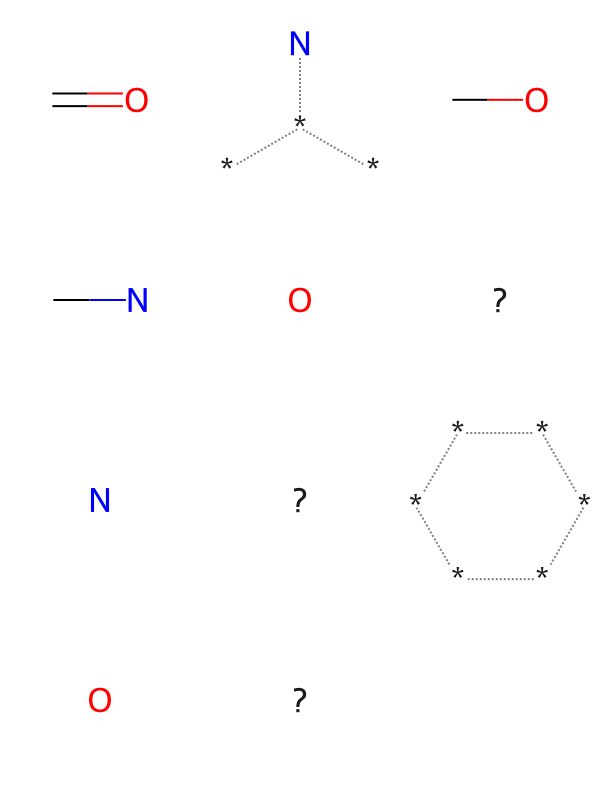

In [85]:
Draw.MolsToGridImage(mol_smarts_per_motif[10:])

---

### Unknown Dataset

In [24]:
#spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"

In [25]:
smiles_per_motifs_diffDB, predicted_motifs_diffDB = predict_with_lda(lda_model, spectra_path_diffDB, id2word)

In [26]:
annotated_motifs_diffDB = []
purities_maccs_diffDB = []
for smiles_per_motif in smiles_per_motifs_diffDB:
    annotated_motif, purity_maccs = annotate_motifs(smiles_per_motif)
    annotated_motifs_diffDB.append(annotated_motif)
    purities_maccs_diffDB.append(purity_maccs)

The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


In [27]:
for motif_number, purity_maccs in enumerate(purities_maccs_diffDB):
    purity_maccs_nan = purity_maccs.copy()
    purity_maccs_nan[purity_maccs_nan == 0] = np.nan
    print(motif_number, len(smiles_per_motifs_diffDB[motif_number]),len(annotated_motifs_diffDB[motif_number]), np.nanmean(purity_maccs_nan))

0 0 0 nan
1 0 0 nan
2 0 0 nan
3 0 0 nan
4 0 0 nan
5 0 0 nan
6 0 0 nan
7 0 0 nan
8 0 0 nan
9 0 0 nan
10 1 79 1.0
11 0 0 nan
12 0 0 nan
13 0 0 nan
14 0 0 nan
15 0 0 nan
16 0 0 nan
17 1 80 1.0
18 0 0 nan
19 0 0 nan
20 0 0 nan
21 0 0 nan
22 0 0 nan
23 1 36 1.0
24 0 0 nan
25 0 0 nan
26 2 2 0.5098039215686274
27 0 0 nan
28 0 0 nan
29 2 18 0.5833333333333334
30 0 0 nan
31 4 6 0.3477272727272727
32 1 37 1.0
33 6 9 0.24681238615664844
34 1 45 1.0
35 1 29 1.0
36 2 15 0.5862068965517241
37 0 0 nan
38 2 6 0.531578947368421
39 2 7 0.5546875
40 3 8 0.42611683848797244
41 5 2 0.2768211920529801
42 0 0 nan
43 3 14 0.4809523809523809
44 3 6 0.4479166666666667
45 3 17 0.5333333333333332
46 4 6 0.3475609756097561
47 5 10 0.3441176470588235
48 3 7 0.42028985507246375
49 1 56 1.0
50 4 4 0.3489010989010989
51 4 2 0.30743243243243246
52 1 60 1.0
53 6 4 0.3034188034188034
54 9 2 0.17965367965367968
55 13 3 0.17066534751422213
56 10 2 0.16044776119402984
57 12 5 0.18011603375527427
58 22 5 0.13261183261183263


C:\Users\dietr004\AppData\Local\Temp\ipykernel_31628\3576634217.py:4: RuntimeWarning: Mean of empty slice
  print(motif_number, len(smiles_per_motifs_diffDB[motif_number]),len(annotated_motifs_diffDB[motif_number]), np.nanmean(purity_maccs_nan))


In [28]:
motif_number = 22

In [29]:
len(annotated_motifs_diffDB[motif_number])

0

In [30]:
annotated_motifs_diffDB[motif_number]

[]

In [31]:
smiles_per_motifs_diffDB[motif_number]

[]

In [32]:
mol_per_motif_diffDB = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs_diffDB[motif_number]]

In [33]:
Draw.MolsToGridImage(mol_per_motif_diffDB)

[11:56:53] 

****
Pre-condition Violation
no draw context
Violation occurred on line 211 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
Failed Expression: dp_cr
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 211 in file Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2023.09.4
	BOOST: 1_78


----

In [64]:
smarts_mol = [Chem.MolFromSmarts(smarts) for smarts in annotated_motifs_diffDB[motif_number]]

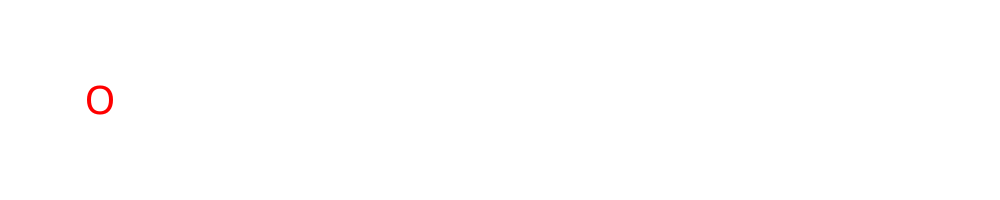

In [67]:
Draw.MolsToGridImage(smarts_mol[:5], molsPerRow=5)

In [29]:
Draw.MolsToGridImage(smarts_mol[9:], molsPerRow=5)

[14:52:27] 

****
Pre-condition Violation
no draw context
Violation occurred on line 211 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
Failed Expression: dp_cr
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 211 in file Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2023.09.4
	BOOST: 1_78


### Cluster comparison